In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_file = "/kaggle/input/playground-series-s5e5/train.csv"
test_file = "/kaggle/input/playground-series-s5e5/test.csv"

In [4]:
train_data = pd.read_csv(train_file)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [5]:
train_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [6]:
# Segregate columns

num_cols = train_data.select_dtypes(['int64','float64']).columns.to_list()

target = 'Calories'

cat_cols = train_data.select_dtypes('object').columns.to_list()

num_cols.remove(target)
num_cols.remove('id')

In [7]:
num_cols

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

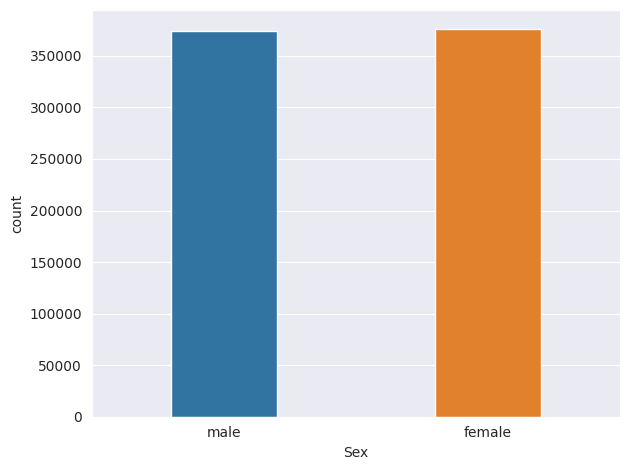

In [8]:
# EDA

plt.figure()
sns.set_style('darkgrid')
sns.countplot(data=train_data, x='Sex', width = 0.4)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

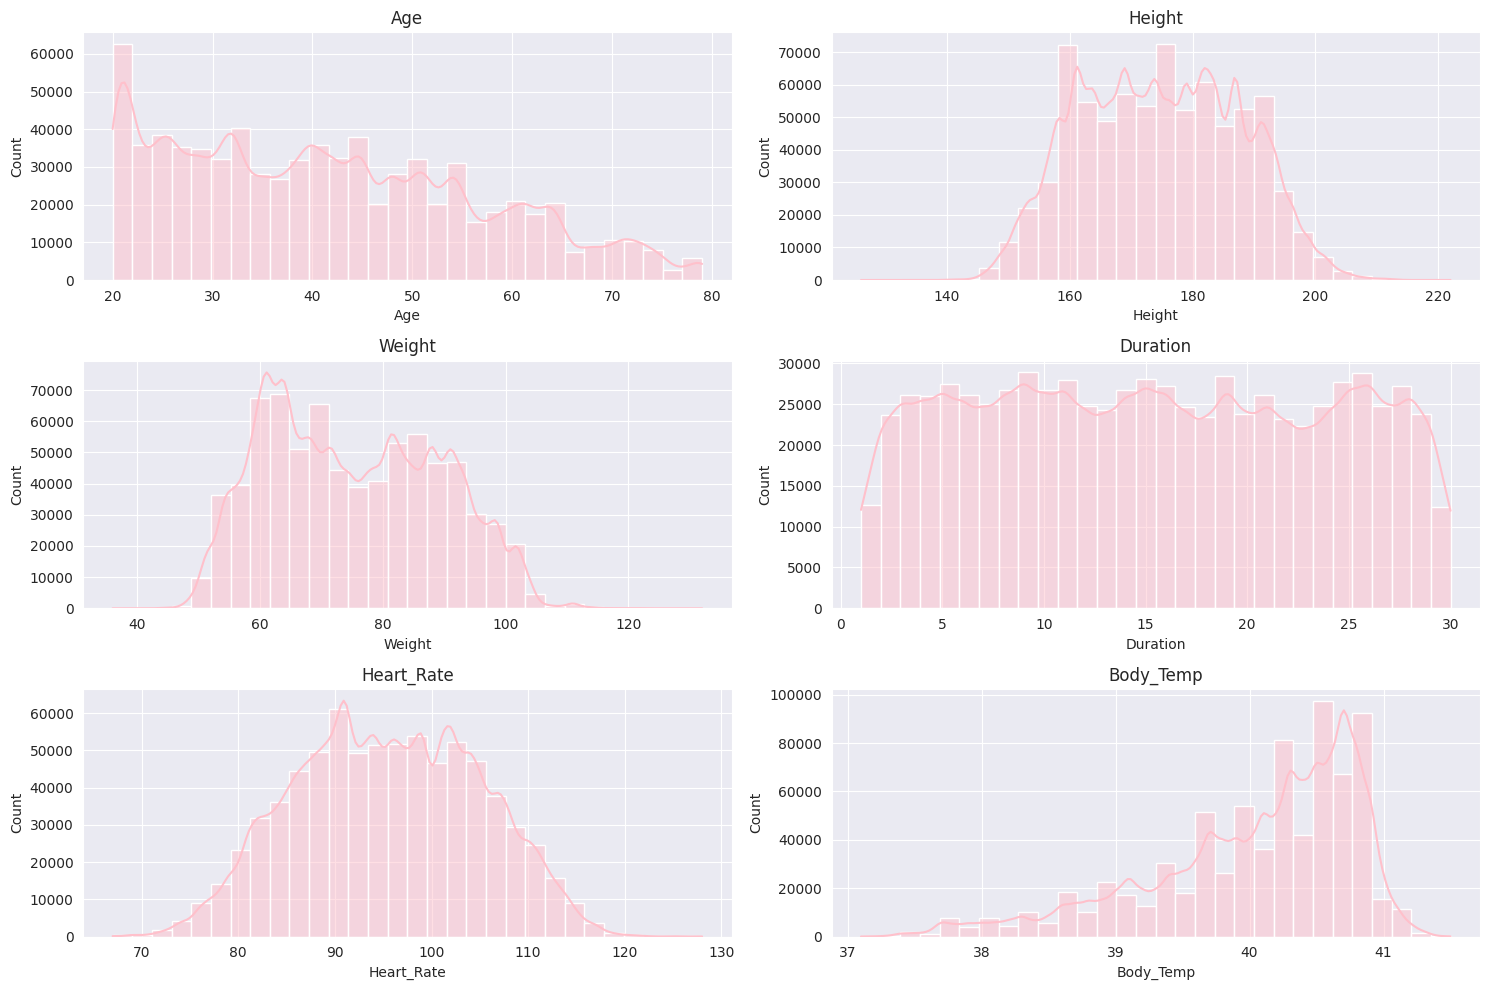

In [9]:
# EDA - Univariate Analysis 

plt.figure()
fig, axes = plt.subplots(3, 2, figsize=[15,10])
sns.set_style('darkgrid')
for i, col in enumerate(num_cols):
    sns.histplot(data=train_data, x=col, bins=30, kde=True, ax=axes[i//2,i%2], color='pink')
    axes[i//2,i%2].set_title(col)
    plt.tight_layout()
plt.show()

    

<Figure size 640x480 with 0 Axes>

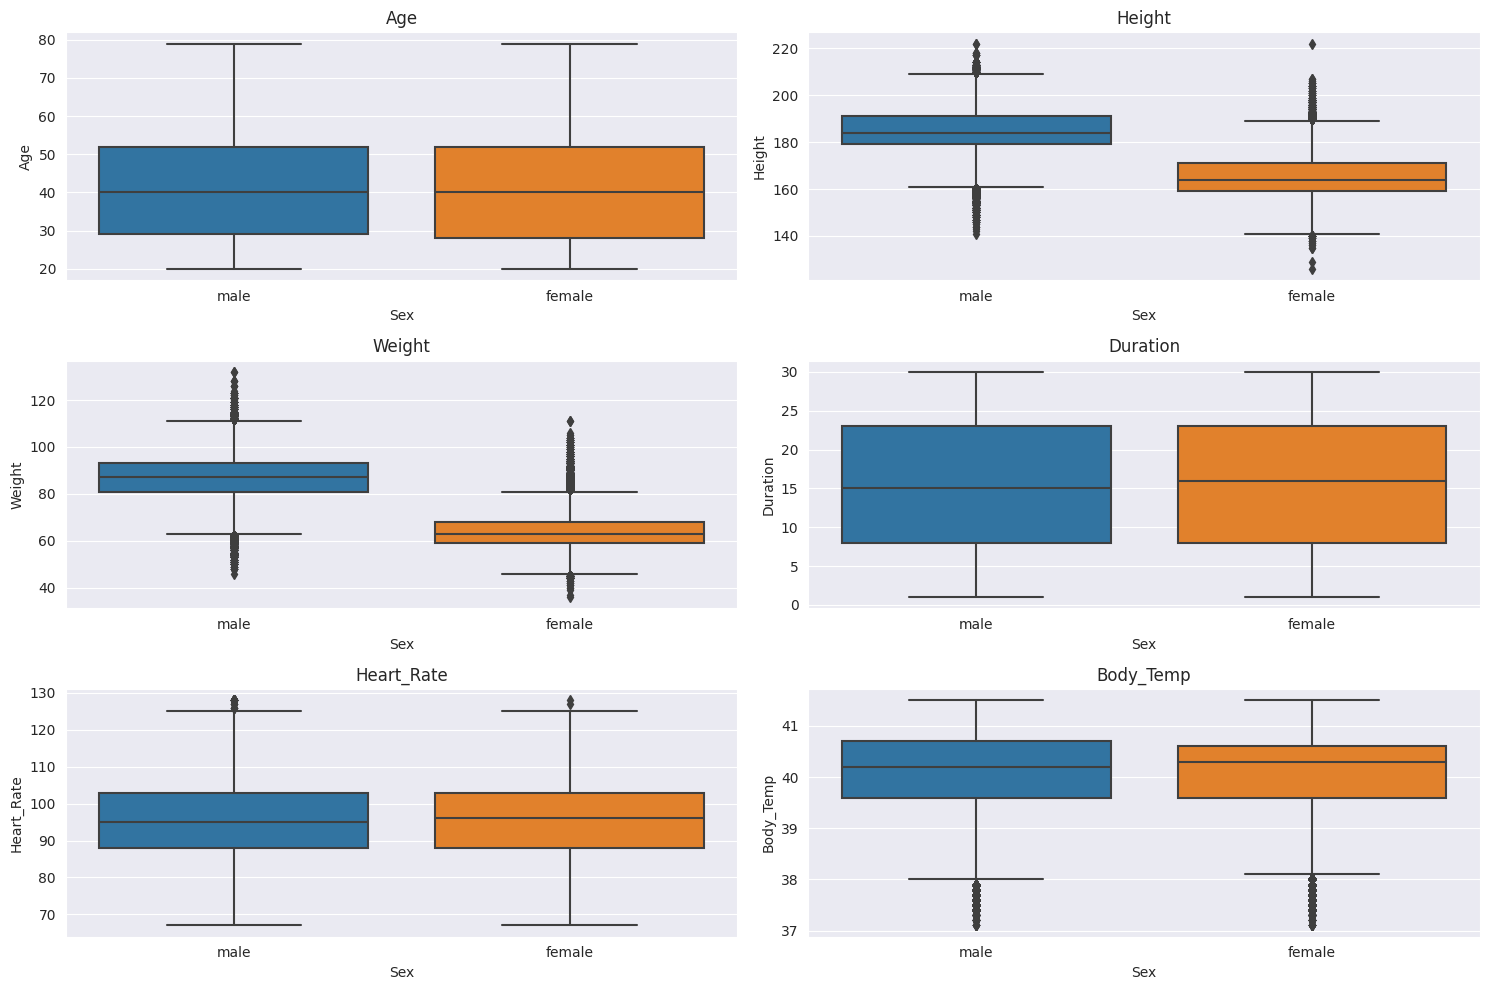

In [10]:
plt.figure()
fig, axes = plt.subplots(3, 2, figsize=[15,10])
sns.set_style('darkgrid')
# sns.color_palette("dark", 8)
for i, col in enumerate(num_cols):
    sns.boxplot(data=train_data, x='Sex', y=col, ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(col)
    plt.tight_layout()
plt.show()

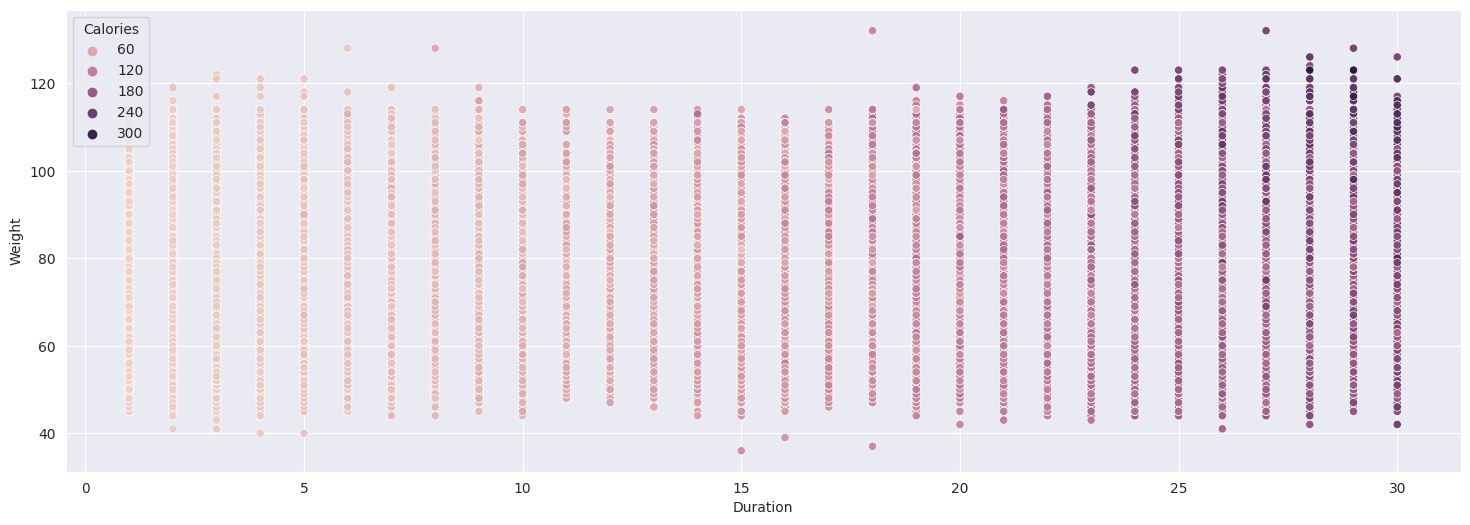

In [11]:
plt.figure(figsize=[18,6])
sns.color_palette("tab10")
sns.scatterplot(data=train_data, y='Weight', x='Duration', hue='Calories')
plt.show()

In [12]:
train_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


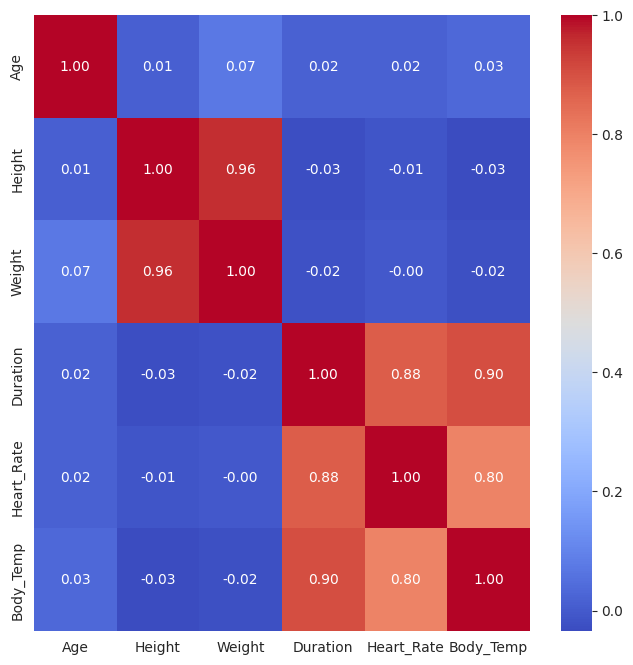

In [13]:
plt.figure(figsize=[8,8])
sns.heatmap(data=train_data[num_cols].corr(), cmap='coolwarm', annot=True, fmt='0.2f')
plt.show()

In [14]:
train_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [15]:
train_data.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


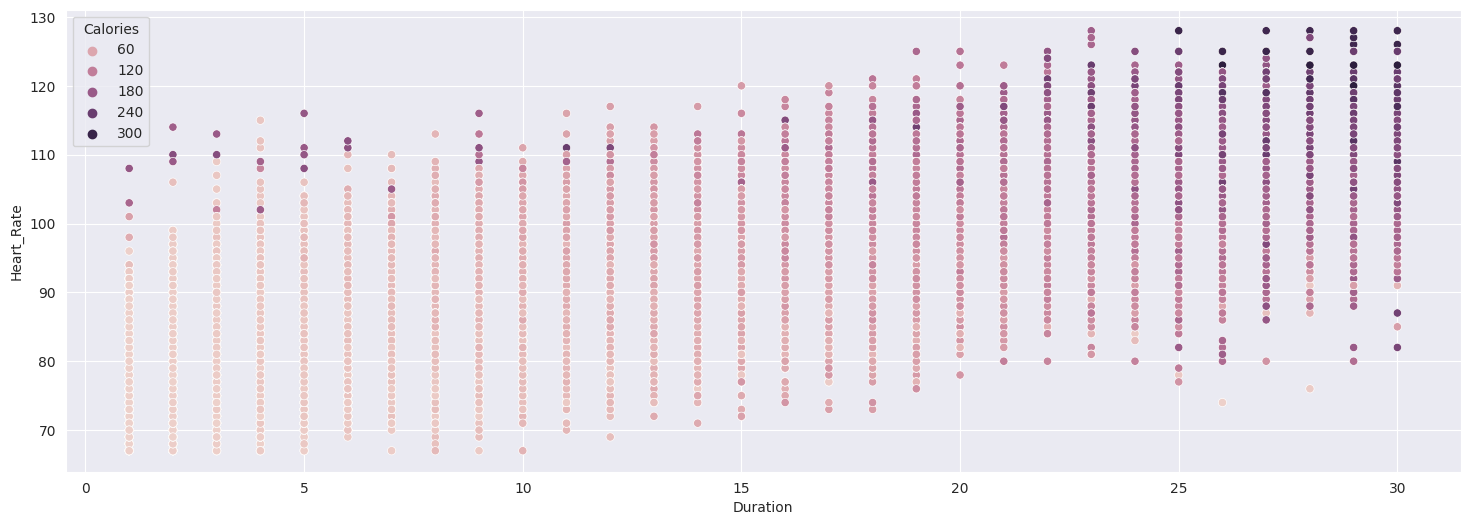

In [16]:
plt.figure(figsize=[18,6])
sns.color_palette("tab10")
sns.scatterplot(data=train_data, y='Heart_Rate', x='Duration', hue='Calories')
plt.show()

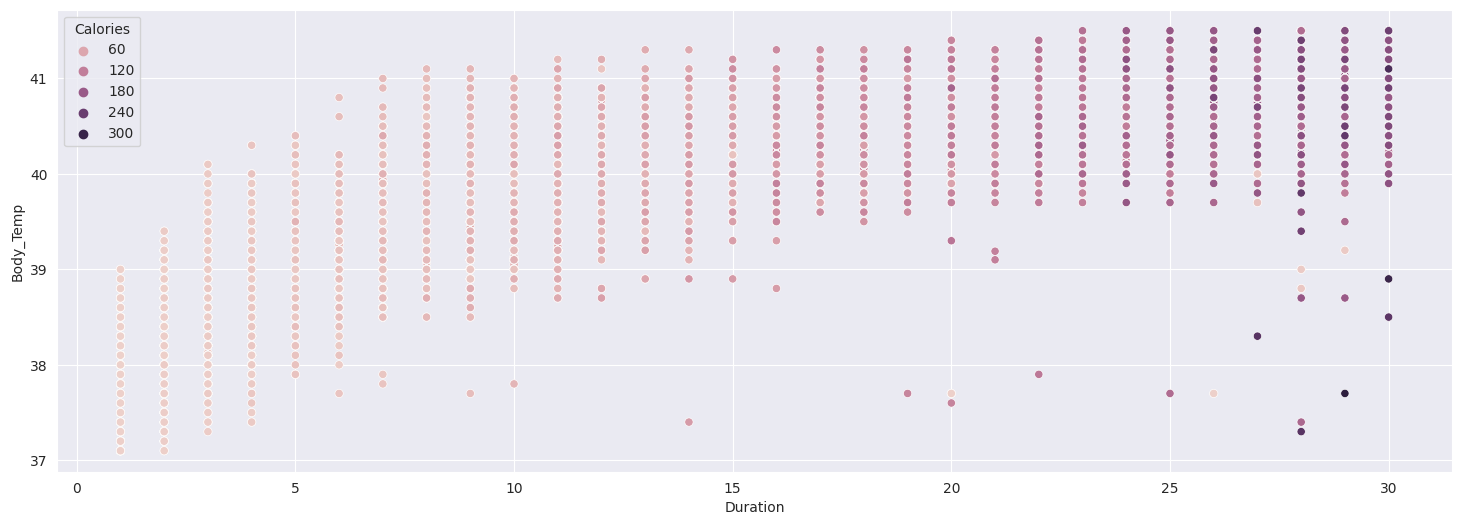

In [17]:
plt.figure(figsize=[18,6])
sns.color_palette("tab10")
sns.scatterplot(data=train_data, y='Body_Temp', x='Duration', hue='Calories')
plt.show()

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [19]:
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [20]:
le = LabelEncoder()

In [21]:
train_data['Sex'] = le.fit_transform(train_data['Sex'])

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  int64  
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 51.5 MB


In [23]:
train_data.drop(columns=['id'], inplace=True)

In [24]:
train_data[num_cols].describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


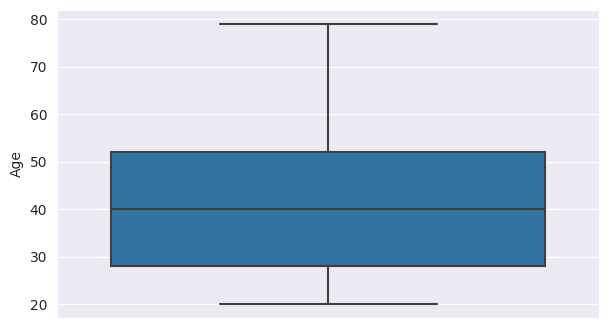

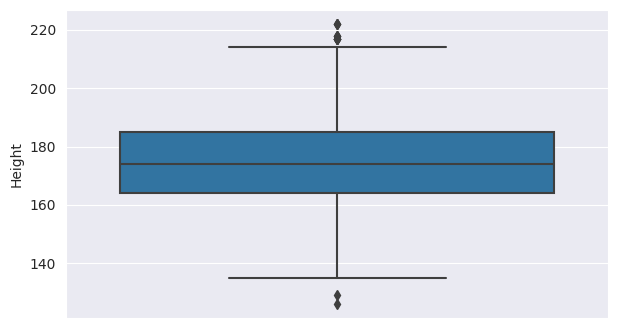

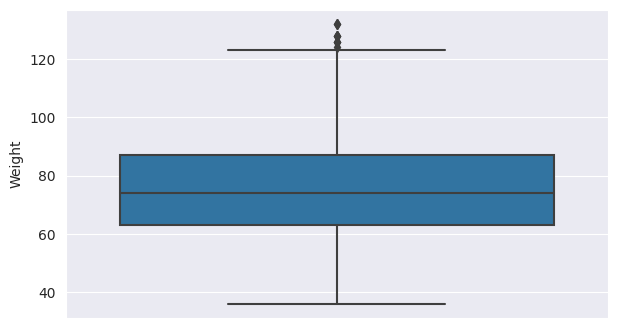

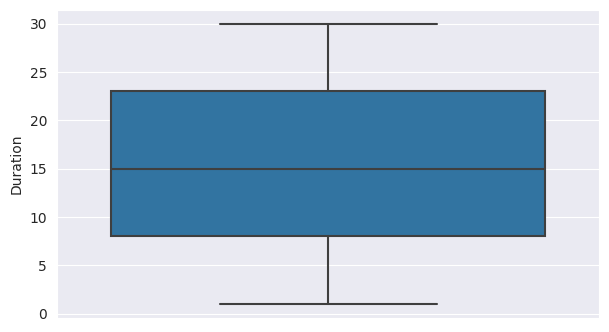

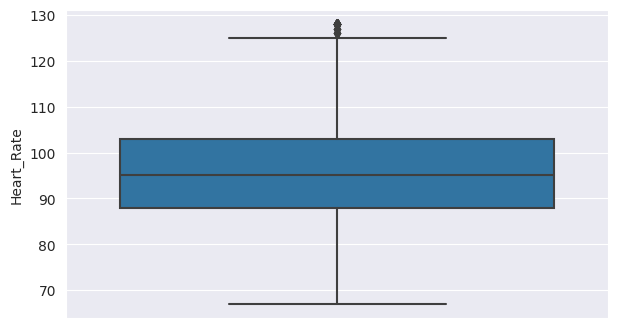

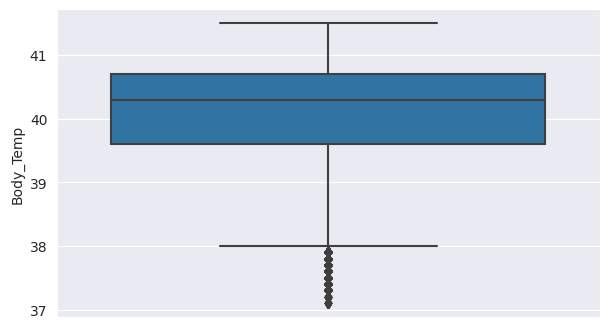

In [25]:
for col in num_cols:
    plt.figure(figsize=[7,4])
    sns.boxplot(data=train_data, y=col)
    plt.show()

In [26]:
train_data[num_cols].head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,36,189.0,82.0,26.0,101.0,41.0
1,64,163.0,60.0,8.0,85.0,39.7
2,51,161.0,64.0,7.0,84.0,39.8
3,20,192.0,90.0,25.0,105.0,40.7
4,38,166.0,61.0,25.0,102.0,40.6


In [27]:
df_train, df_test = train_test_split(train_data, test_size=0.20, random_state=101)

In [28]:
y_train = df_train.pop('Calories')
X_train = df_train

In [29]:
y_test = df_test.pop('Calories')
X_test = df_test

In [30]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [31]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [32]:
df_train.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
39223,0,-0.094026,-0.912758,-0.725924,-0.051030,-0.263181,0.337804
712327,1,-1.346348,-0.444762,-0.010591,1.265889,1.324469,0.978946
90055,0,-0.950878,0.491229,0.132475,-1.128509,-0.898241,-1.200938
112855,1,0.828737,0.725227,1.634672,-1.008790,-0.686554,-0.431567
442198,1,-1.082701,0.569229,0.990873,-1.367949,-1.533301,-1.713851


In [33]:
df_test.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
154307,0,2.212881,-1.068757,-0.797457,-0.889070,-2.062517,-0.559795
176242,1,-0.687231,2.207214,1.992338,1.625049,1.959529,0.978946
271761,0,0.499178,0.959225,0.704741,1.505329,1.536156,0.850718
233817,0,0.960560,-1.614752,-0.940523,0.068690,-0.369024,0.722489
535245,0,-1.082701,-0.990758,-1.083590,-0.290470,0.266036,1.107175


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [35]:
# model building 

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    # 'Random Forest': RandomForestRegressor(n_estimators=100),
    'XGBoost' : XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'LightGBM' : LGBMRegressor(),
    'Catboost' : CatBoostRegressor(verbose=0)
}

In [36]:
metrics = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.clip(y_pred, a_min=0.1, a_max=None)
    msle = mean_squared_log_error(y_test, y_pred)
    rmsle = np.sqrt(msle)
    print(f"model:{name}, rmsle:{rmsle}")
    metrics[name] = rmsle

model:Linear Regression, rmsle:0.5513679295768179
model:Decision Tree, rmsle:0.08611410757939723
model:XGBoost, rmsle:0.1286799587545245
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 7
[LightGBM] [Info] Start training from score 88.312512
model:LightGBM, rmsle:0.07074629889777004
model:Catboost, rmsle:0.06028613096004155


In [37]:
# hyperparameters tuning

from sklearn.model_selection import RandomizedSearchCV 

# hpt_model = XGBRegressor(random_state=42)
hpt_model = CatBoostRegressor(verbose=0)

'''
XGB_params = {
        'n_estimators' : [100, 200, 500, 700, 800, 900],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25], 
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.7, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }


cb_params = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'iterations': [100, 200, 500],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.1, 0.2, 0.5, 1.0],
    'border_count': [32, 64, 128]
}
'''

cb_params = {'learning_rate': [0.1], 
             'l2_leaf_reg': [9], 
             'iterations': [500], 
             'depth': [10], 
             'border_count': [64], 
             'bagging_temperature': [0.1]
             }
folds = 3

param_comb = 100

grid_search = RandomizedSearchCV(
    estimator=hpt_model ,
    param_distributions=cb_params,
    scoring='neg_mean_squared_error', 
    n_jobs=-1,
    n_iter=param_comb, 
    cv=5, 
    verbose=3, 
    random_state=42
)

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
y_pred = np.clip(y_pred, a_min=0.1, a_max=None)
msle = mean_squared_log_error(y_test, y_pred)
rmsle = np.sqrt(msle)
print(f"Catboost rmsle:{rmsle}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Catboost rmsle:0.060101480625800986


In [38]:
# treatment of test data

test_data = pd.read_csv(test_file)
df = test_data.copy()
df['Sex'] = le.fit_transform(df['Sex'])
df.drop(columns=['id'], inplace=True)

In [39]:
# Predictions on test data

predictions = grid_search.predict(df)

In [40]:
results_df = pd.DataFrame(
    {
        'id' : test_data['id'],
        'Calories' : predictions
    }
)

In [41]:
# create submission file

results_df.to_csv('calorie_expend_submission.csv', index=False)